In [37]:
#pip install nbformat
#pip install plotly --upgrade

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py

%matplotlib widget

In [38]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
parula_map.set_under(cm_data[0])

In [39]:
filename = '/home/devlamin/Documents/WKBeam_related/WKBacca_QL/QL_bounce_TCV74302_test2.h5'
#filename = '/home/devlamin/Documents/WKBeam_related/WKBacca_QL/QL_bounce_TCV74310_test.h5'
#filename = '/home/devlamin/Documents/WKBeam_related/Cases_ran_before/QL_bounce_TCV74310_test.h5'
#Had to move the file due to size limit


In [40]:
file = h5py.File(filename, 'r')
# Read the data

# Select the wanted grid
grid = 'hw'
dataname = 'DRF0_' + grid

QL_bounce_nofluct = file[dataname][()]
print(QL_bounce_nofluct.shape)
QL_bounce_nofluct = np.sum(QL_bounce_nofluct, axis=-1)
psi = file['psi'][()]
theta = file['theta'][()]  
p_norm = file['p_norm'][()]
ksi0 = file['ksi0'][()][()]
harmonics = file['harmonics'][()]

if grid == 'wh':
    p_norm = p_norm
    ksi0 = 0.5 * (ksi0[1:] + ksi0[:-1])
    Trapksi0 = file['Trapksi0_h'][()]
elif grid == 'hh':
    p_norm = 0.5 * (p_norm[1:] + p_norm[:-1])
    ksi0 = 0.5 * (ksi0[1:] + ksi0[:-1])
    Trapksi0 = file['Trapksi0_h'][()]
else:
    p_norm = 0.5 * (p_norm[1:] + p_norm[:-1])
    ksi0 = ksi0
    Trapksi0 = file['Trapksi0_w'][()]

p_max = np.max(p_norm)
rho_max = np.max(np.sqrt(psi))


h5py.File.close(file)

(1, 19, 40, 1)


In [41]:
QL_bounce_nofluct.shape

(1, 19, 40)

In [42]:
Pnorm, Ksi0 = np.meshgrid(p_norm, ksi0)

Ppar, Pper = Pnorm*Ksi0, Pnorm*np.sqrt(1-Ksi0**2)

PPAR = np.tile(Ppar, (len(psi), 1, 1))
PPER = np.tile(Pper, (len(psi), 1, 1))
KSI0 = np.tile(Ksi0, (len(psi), 1, 1))

RHO = np.tile(np.sqrt(psi.T), (len(p_norm), len(ksi0), 1)).T

QL_bounce_nofluct = np.transpose(QL_bounce_nofluct, (0, 2, 1))

print(QL_bounce_nofluct.shape)
print(PPER.shape)
print(PPAR.shape)
print(RHO.shape)
print(KSI0.shape)

(1, 40, 19)
(1, 40, 19)
(1, 40, 19)
(1, 40, 19)
(1, 40, 19)


In [43]:
QL_bounce_nofluct = QL_bounce_nofluct*(1-KSI0**2) # D_rf_pp, DKE 4.298

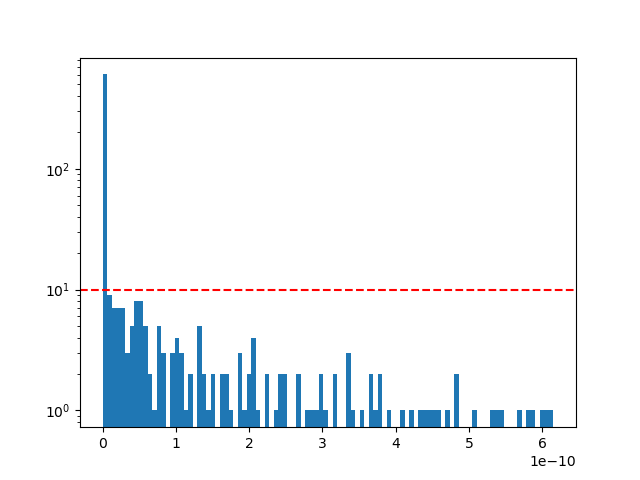

In [44]:
Ql_all = QL_bounce_nofluct.flatten()
plt.figure()
freqbins = plt.hist(Ql_all, bins=100, density=False, log=True)
plt.axhline(1e1, color='r', linestyle='--')
plt.show()

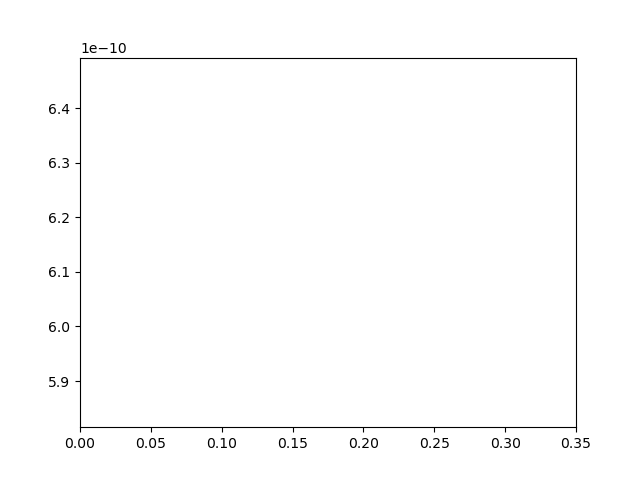

In [45]:
plt.figure()
plt.plot(np.sqrt(psi),np.nanmax(QL_bounce_nofluct, axis=(1, 2)))

#plt.yscale('log')
plt.xlim(0, rho_max)
plt.show()

(array([0]), array([6]), array([8]))
6.15388275401268e-10


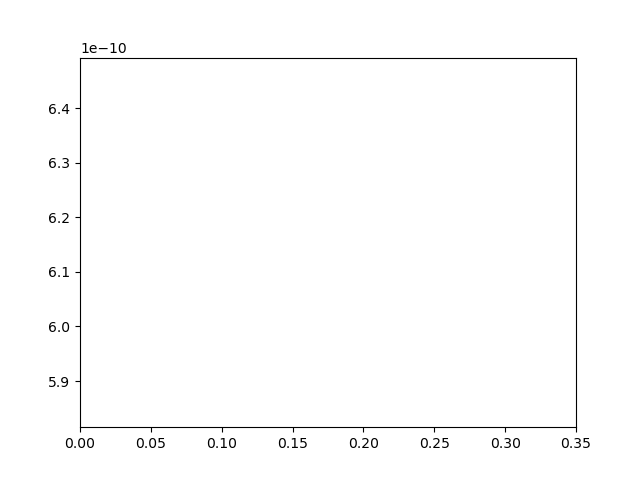

In [46]:
max_QL = np.nanmax(QL_bounce_nofluct)
print(np.where(QL_bounce_nofluct == max_QL))
QL_bounce_nofluct = np.where(np.isnan(QL_bounce_nofluct), 0, QL_bounce_nofluct)
QL_bounce_nofluct = np.where(QL_bounce_nofluct > 1e-7, 0, QL_bounce_nofluct)

print(max_QL)

plt.figure()
plt.plot(np.sqrt(psi),np.nanmax(QL_bounce_nofluct, axis=(1, 2)))

#plt.yscale('log')
plt.xlim(0, rho_max)
plt.show()


In [47]:
Lowerbound = 1e-12
QL_present_nofluct = QL_bounce_nofluct[QL_bounce_nofluct>Lowerbound]
QL_present_nofluct /= np.nanmax(QL_present_nofluct)

print(QL_present_nofluct.shape[0]/QL_bounce_nofluct.size)

RHO_present_nofluct = RHO[QL_bounce_nofluct>Lowerbound]
PPAR_present_nofluct = PPAR[QL_bounce_nofluct>Lowerbound]
PPER_present_nofluct = PPER[QL_bounce_nofluct>Lowerbound]

0.24078947368421053


Text(0.5, 1.0, 'Rho = 0.35')

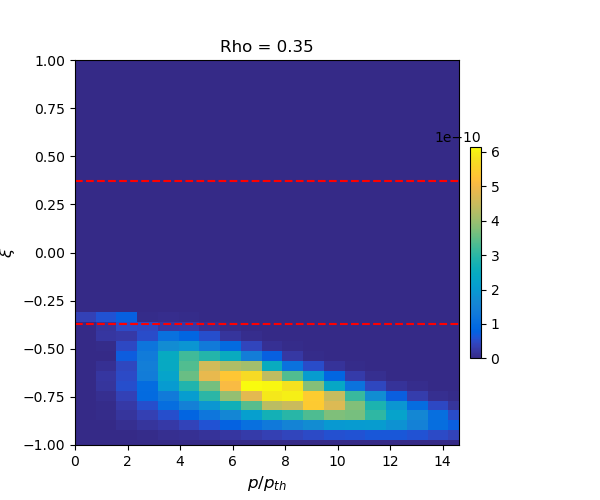

In [48]:
plt.figure(figsize=(6, 5))
ax = plt.subplot(111)
QL_bounce_nofluct = np.where(QL_bounce_nofluct<Lowerbound, 0, QL_bounce_nofluct)
i = 0
fig = ax.pcolormesh(Pnorm, Ksi0, QL_bounce_nofluct[i], cmap=parula_map)#, norm=LogNorm())
#fig = ax.contourf(Pnorm, Ksi, QL_bounce_nofluct[i], levels=100, cmap=parula_map)#, norm=LogNorm(1e-4, 1e0))

#fig = plt.contourf(PPAR[i], PPER[i], QL_bounce[i], cmap=parula_map, norm=LogNorm(),levels=np.logspace(-3, 0, 100))
colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)
#colorbar.set_label(label=r'$D^{EC,0}_{n=2,3}$ [A.U.]', size=10)
#plt.contour(PPAR[i], PPER[i], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
#plt.annotate(r'n=2', xy=(3, 1), xytext=(7, 2), textcoords='offset points', fontsize=12)
#plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

ax.axhline(Trapksi0[i], color='r', linestyle='--')
ax.axhline(-Trapksi0[i], color='r', linestyle='--')
ax.set_xlabel(r'$p/p_{th}$', size=12)
ax.set_ylabel(r'$\xi$', size=12)
ax.set_ylim(-1, 1)
ax.set_xlim(0, p_max)
ax.set_title(f'Rho = {np.sqrt(psi[i])}')


In [49]:
def Trapping_line(p_par, Trapksi0, i_psi):
    #Trapping line, giving p_perp_Trap = p_par_Trap * sqrt(1 - ksi0_T^2)/ksi0_T*sign(p_par_Trap)
    return np.sign(p_par) * p_par * np.sqrt(1 - Trapksi0[i_psi]**2)/Trapksi0[i_psi]

IndexError: index 8 is out of bounds for axis 0 with size 1

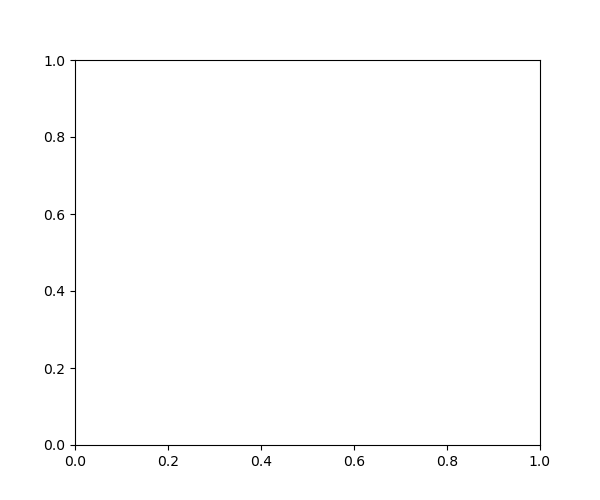

In [50]:
plt.figure(figsize=(6, 5))
ax = plt.subplot(111)
QL_bounce_nofluct = np.where(QL_bounce_nofluct<Lowerbound, 0, QL_bounce_nofluct)
i = 8
fig = ax.pcolormesh(PPAR[i], PPER[i], QL_bounce_nofluct[i], cmap=parula_map)#, norm=LogNorm())
#fig = plt.contourf(PPAR[i], PPER[i], QL_bounce[i], cmap=parula_map, norm=LogNorm(),levels=np.logspace(-3, 0, 100))
colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)
#colorbar.set_label(label=r'$D^{EC,0}_{n=2,3}$ [A.U.]', size=10)
plt.contour(PPAR[i], PPER[i], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
plt.annotate(r'n=2', xy=(3, 1), xytext=(7, 2), textcoords='offset points', fontsize=12)
plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

p_perp_Trap = Trapping_line(np.linspace(-p_max, p_max, 200), Trapksi0, i)
plt.plot(np.linspace(-p_max, p_max, 200), p_perp_Trap, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$p_{||}/p_{th}$', size=12)
ax.set_ylabel(r'$p_{\perp}/p_{th}$', size=12)
ax.set_ylim(0, p_max)
#ax.set_xlim(-15, 15)
ax.set_aspect('equal')
ax.set_title(f'Rho = {np.sqrt(psi[i])}')


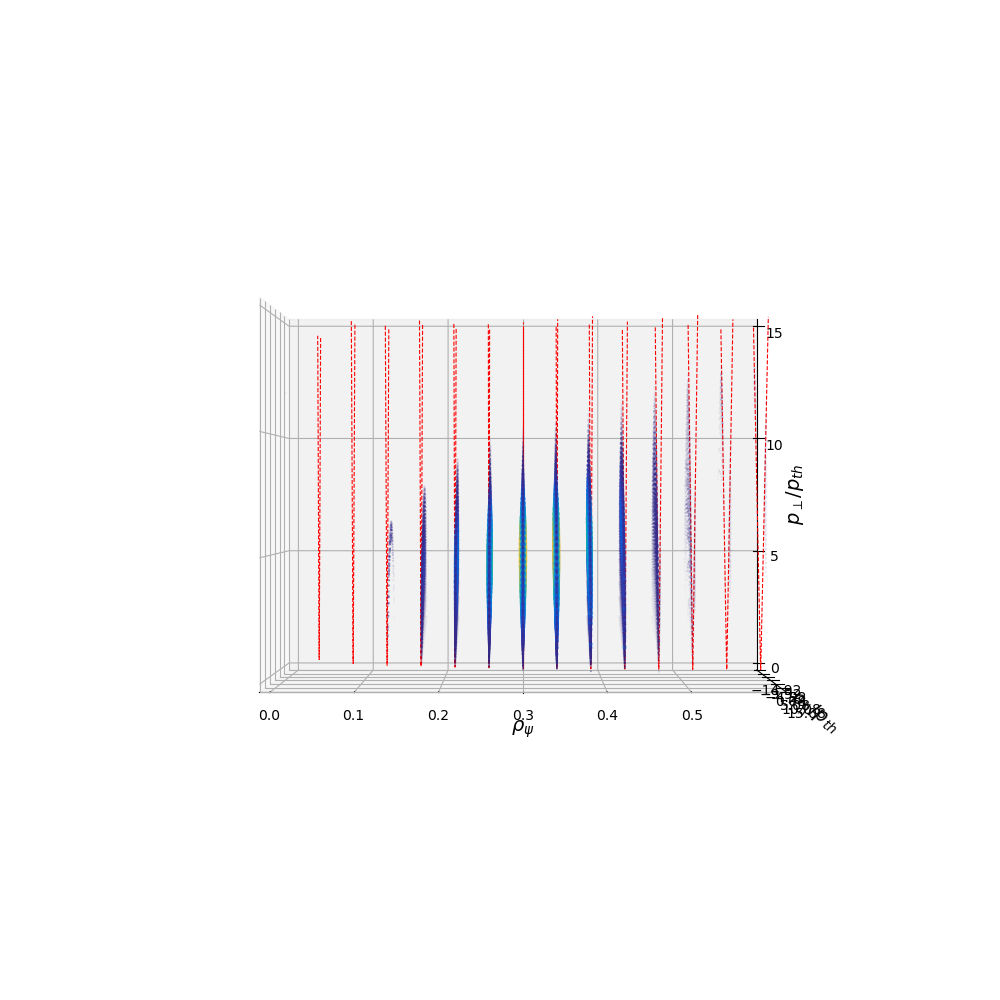

In [217]:
# 3D plot of the QL_bounce

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

#ax.scatter(RHO, PPAR, PPER, c=QL_bounce, s=100*QL_bounce**2, alpha=0.5)
ax.scatter(RHO_present_nofluct[::2], PPAR_present_nofluct[::2], PPER_present_nofluct[::2], c=QL_present_nofluct[::2], cmap=parula_map, s=30*QL_present_nofluct[::2], alpha=.3)

# Plot a vertical surface
"""
rho = RHO[i, 0, 0]
ax.plot_surface(np.tile(rho, (len(p_norm), len(ksi0_h))).T, PPAR[i], PPER[i], alpha=0.5, color='grey')
ax.plot([rho, rho], [-16, 16], [-.5, -0.5], color='black', linestyle='dashed', linewidth=1)
ax.plot([rho, rho], [-16, -16], [-.5, 16], color='black', linestyle='dashed', linewidth=1)
"""

# Plot the trapping line at every rho
p_par_T = np.linspace(-p_max, p_max, 200)
for i in range(0, len(psi)):
    p_perp_T = Trapping_line(p_par_T, Trapksi0, i)
    # Cut the line short when it would leave the box
    p_perp_T_toplot = p_perp_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    p_par_T_toplot = p_par_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    ax.plot(np.sqrt(psi[i])*np.ones_like(p_par_T_toplot), p_par_T_toplot, p_perp_T_toplot, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$\rho_{\psi}$', fontsize= 14)
ax.set_ylabel(r'$p_{\||}/p_{th}$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/p_{th}$', fontsize= 14, rotation=180)

ax.set_xlim([rho_max, 0])
ax.set_xticks(np.arange(0, rho_max, 0.1))
ax.set_ylim([-p_max, p_max])
ax.set_yticks(np.arange(-p_max, p_max+1, 5))
ax.set_zlim([0, p_max])
ax.set_zticks(np.arange(0, p_max+1, 5))

ax.view_init(elev=0, azim=90)

In [218]:
nperp = np.linspace(0, 1, 100)
dnperp = np.diff(nperp)[0]
dnpar = dnperp*2
dV_N = 2 * np.pi * nperp * dnperp * dnpar

dV_N[None, None, :].shape

(1, 1, 100)